In [57]:
# To ensure the library is reloaded every time
import sys
if 'Photu.Photu' in sys.modules:  
    del sys.modules["Photu.Photu"]
from Photu.Photu import *

imgLoc = "./images/face001.jpg"
image = Photu(imgLoc)
image

Dimension: (422, 759, 3)

In [51]:
image.info()

This image is:  <class 'numpy.ndarray'> with dimensions: (422, 759, 3)
Dimension:  (422, 759, 3)
Current Path:  /Users/soumendra/github/computer-vision-primer/notebooks/Photu


Dimension: (422, 759, 3)

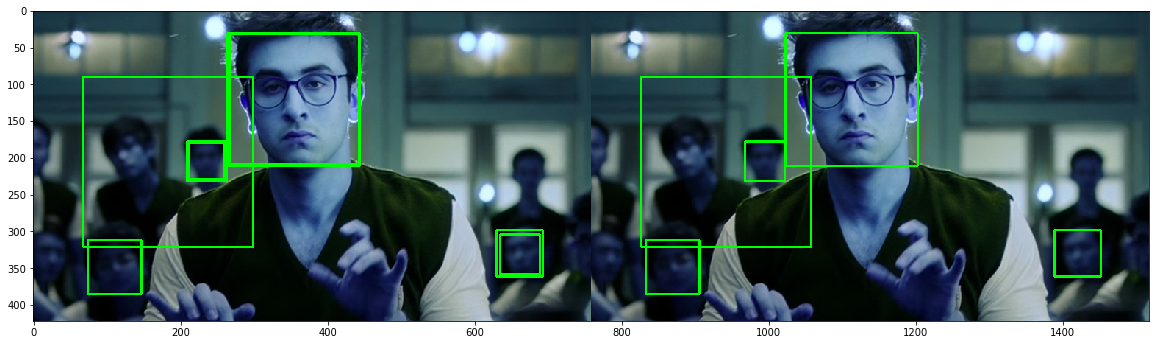

Dimension: (422, 759, 3)

In [49]:
image.face_detector().plot2()

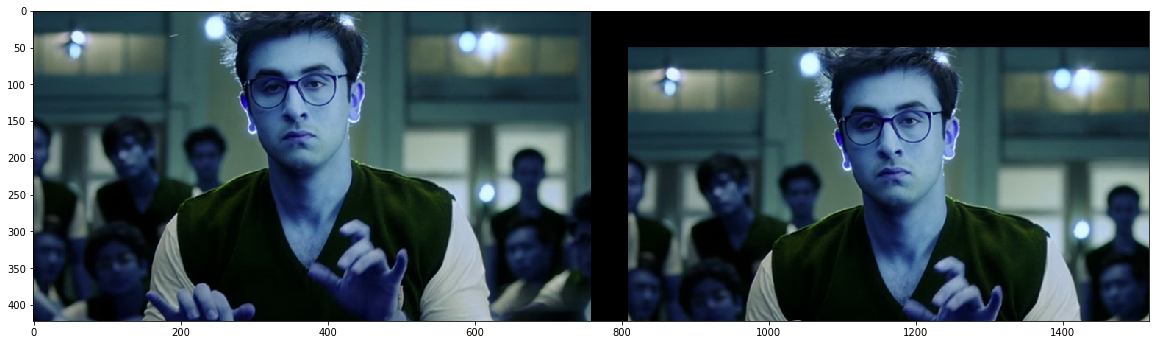

Dimension: (422, 759, 3)

In [52]:
image.translate(50, 50).plot2()

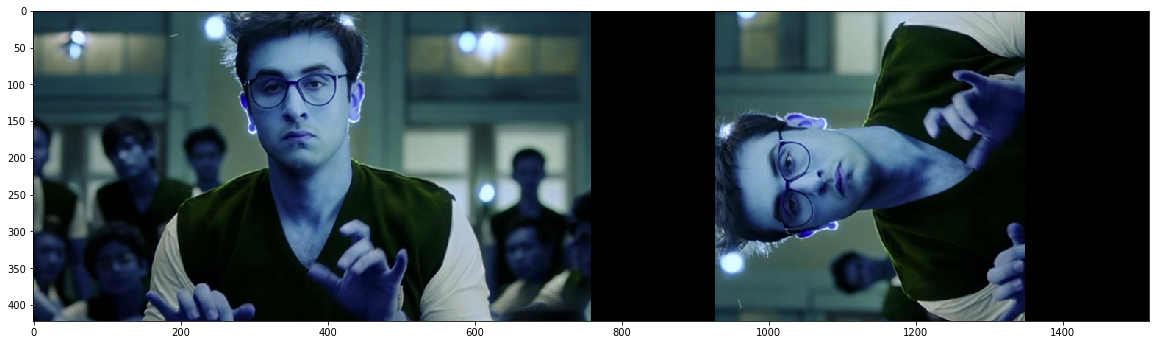

Dimension: (422, 759, 3)

In [58]:
image.rotate(90).plot2()

In [31]:
%ls Photu/cascades/

haarcascade_eye.xml
haarcascade_eye_tree_eyeglasses.xml
haarcascade_frontalcatface.xml
haarcascade_frontalcatface_extended.xml
haarcascade_frontalface_alt.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_alt_tree.xml
haarcascade_frontalface_default.xml
haarcascade_lowerbody.xml
haarcascade_profileface.xml
haarcascade_smile.xml
haarcascade_upperbody.xml


In [ ]:


# Create a pipeline
def pipeline_display(imgLoc):
    image = Photu(imgLoc).info()\
        .display()\
        .make_gray()\
        .gaussian_blur(9)\
        .canny(50, 150).display()\
        .create_mask('region')\
        .image_and_mask()\
        .display()\
        .hough(2, np.pi/180, 5, 10, 5)\
        .display()\
        .weighted_img()\
        .display()\
        .save(imgLoc.split('.')[0] + '-lalide.' + imgLoc.split('.')[1])
    return(image)

Now let's apply the pipeline on an image.

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
Dimension:  (540, 960, 3)


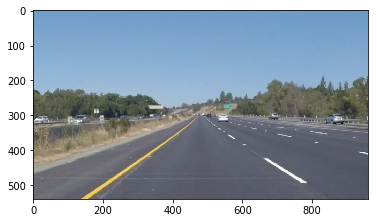

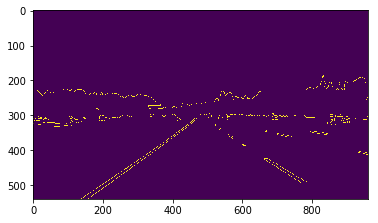

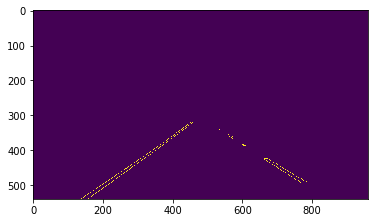

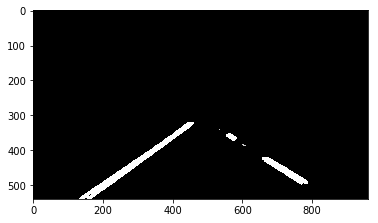

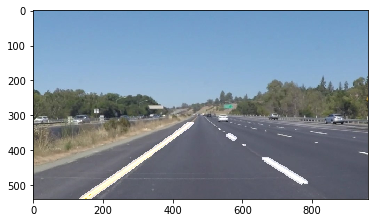

In [2]:
pipeline_display("test_images/solidYellowLeft.jpg")

In [9]:
%%bash
rm test_images/solidYellowLeft-lalide.jpg
rm -rf test_images/.ipynb_checkpoints

## Build a Lane Finding Pipeline

We'll now build a pipeline and apply it on all the images in the `test_images/` folder and then visualize the end result.

In [4]:
def pipeline(imgLoc):
    Photu(imgLoc).make_gray()\
        .gaussian_blur(9)\
        .canny(50, 150)\
        .create_mask('region').image_and_mask()\
        .hough(2, np.pi/180, 5, 10, 5)\
        .weighted_img()\
        .save(imgLoc.split('.')[0] + '-lalide.' + imgLoc.split('.')[1])

In [10]:
import os
loc = os.listdir("test_images/")
for file in loc:
    pipeline("test_images/" + file)

In [11]:
from IPython.display import HTML, display
display(HTML("<table>\
               <tr>\
                 <td><img src='test_images/solidWhiteCurve.jpg'></td>\
                 <td><img src='test_images/solidWhiteCurve-lalide.jpg'></td>\
               </tr>\
               <tr>\
                 <td><img src='test_images/solidWhiteRight.jpg'></td>\
                 <td><img src='test_images/solidWhiteRight-lalide.jpg'></td>\
               </tr>\
               <tr>\
                 <td><img src='test_images/solidYellowCurve.jpg'></td>\
                 <td><img src='test_images/solidYellowCurve-lalide.jpg'></td>\
               </tr>\
               <tr>\
                 <td><img src='test_images/solidYellowCurve2.jpg'></td>\
                 <td><img src='test_images/solidYellowCurve2-lalide.jpg'></td>\
               </tr>\
               <tr>\
                 <td><img src='test_images/solidYellowLeft.jpg'></td>\
                 <td><img src='test_images/solidYellowLeft-lalide.jpg'></td>\
               </tr>\
               <tr>\
                 <td><img src='test_images/whiteCarLaneSwitch.jpg'></td>\
                 <td><img src='test_images/whiteCarLaneSwitch-lalide.jpg'></td>\
               </tr>\
             </table>"))

,
,
,
,
,
,


# Connecting the dots

We'll now connect up the fragments detected to create continuous left and right lane markings. This has been implemented in `'Photu/Photu.py/mask_to_lines()'` (details are in comments). Due to somewhat poor design, we have to again apply the region mask after it.

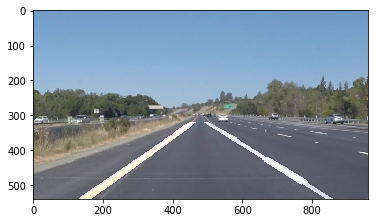

In [12]:
def pipeline_video(imgLoc):
    out = Photu(imgLoc)\
        .make_gray().gaussian_blur(9)\
        .canny(50, 150)\
        .create_mask('region').image_and_mask()\
        .hough(2, np.pi/180, 5, 10, 5)\
        .mask_to_lines()\
        .create_mask('region').image_and_mask()\
        .weighted_img()\
        .image
    return(out)

plt.imshow(pipeline_video("test_images/solidYellowLeft.jpg"))
plt.show()

## Test on Videos

We are finally ready to apply the pipeline to videos.

In [13]:
import sys
if 'Photu.Photu' in sys.modules:  
    del sys.modules["Photu.Photu"]
from Photu.Photu import *

In [16]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # you should return the final output (image where lines are drawn on lanes)
    result = pipeline_video(image)
    return result

### The White Movie

In [15]:
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image)

%time white_clip.write_videofile('white.mp4', audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|█████████▉| 221/222 [00:12<00:00, 19.76it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 5.25 s, sys: 1.64 s, total: 6.88 s
Wall time: 13.7 s


In [18]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('white.mp4'))

### The Yellow Movie

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [19]:
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)

%time yellow_clip.write_videofile('yellow.mp4', audio=False)

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


100%|█████████▉| 681/682 [00:29<00:00, 23.12it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 15.7 s, sys: 4.69 s, total: 20.3 s
Wall time: 30.5 s


In [20]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('yellow.mp4'))

### The Challenge Movie (optional)

The Algorithm performs pretty badly here. Any suggestions about improving it are most welcome.

In [21]:
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image)
%time challenge_clip.write_videofile('extra.mp4', audio=False)

[MoviePy] >>>> Building video extra.mp4
[MoviePy] Writing video extra.mp4


100%|██████████| 251/251 [00:19<00:00, 12.98it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

CPU times: user 9.91 s, sys: 2.99 s, total: 12.9 s
Wall time: 21.3 s


In [22]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('extra.mp4'))

# Appendix

## Some useful functions

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

* `cv2.inRange()` for color selection  
* `cv2.fillPoly()` for regions selection  
* `cv2.line()` to draw lines on an image given endpoints  
* `cv2.addWeighted()` to coadd / overlay two images
* `cv2.cvtColor()` to grayscale or change color
* [cv2.imwrite()](http://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html) to output images to file  
* `cv2.bitwise_and()` to apply a mask to an image